## Phân tích xu hướng sở thích âm nhạc

#### Import các thư viện và các package cần thiết

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

Fontconfig warning: ignoring UTF-8: not a valid region tag


#### Load dữ liệu

In [2]:
df_normal  = pd.read_csv('list_info_02.csv') # Load các thông tin các video về âm nhạc thường
# df = pd.read_csv('list_info_trending.csv') # Load thông tin các video về âm nhạc trending
df_normal.head()


,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,8zKpSM3kDt4,2022-06-25T10:21:40Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H37M13S,2d,...,False,public,True,False,93101,NaN,NaN,0,13.0,['https://en.wikipedia.org/wiki/Music']
1,PnITknczlvU,2022-06-25T10:30:04Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H9M42S,2d,...,False,public,True,False,145034,NaN,NaN,0,38.0,['https://en.wikipedia.org/wiki/Electronic_mus...
2,JI-9dc-J1RU,2022-06-26T08:00:30Z,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,ACV Ballad,"['acv', 'acv ballad', 'nhạc trẻ', 'nhac tre', ...",22,NaN,PT1H32M45S,2d,...,False,public,True,False,16549,NaN,NaN,0,3.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
3,0zpVSx9LHao,2021-06-09T11:00:00Z,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'top 40 bài hát', 'tuyể...",10,vi,PT2H49M7S,2d,...,True,public,True,False,1501371,4832.0,NaN,0,118.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
4,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...",10,NaN,PT2H15M17S,2d,...,False,public,True,False,1179069,4322.0,NaN,0,78.0,['https://en.wikipedia.org/wiki/Electronic_mus...


In [3]:
# Xem thông tin tổng quan về data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3189 non-null   object 
 1   publishAt             3189 non-null   object 
 2   title                 3189 non-null   object 
 3   description           3116 non-null   object 
 4   channelTitle          3189 non-null   object 
 5   tags                  2835 non-null   object 
 6   categoryId            3189 non-null   int64  
 7   defaultAudioLanguage  1738 non-null   object 
 8   duration              3189 non-null   object 
 9   dimension             3189 non-null   object 
 10  definition            3189 non-null   object 
 11  caption               3189 non-null   bool   
 12  privacyStatus         3189 non-null   object 
 13  embeddable            3189 non-null   bool   
 14  madeForKids           3189 non-null   bool   
 15  viewCount            

In [4]:
# Lọc ra các video âm nhạc tức categoryId là 10 - Music
df_normal = df_normal[df_normal['categoryId']==10]

In [5]:
# Xử lý các giá trị null trong data frame
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,8zKpSM3kDt4,2022-06-25T10:21:40Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H37M13S,2d,...,False,public,True,False,93101,0.0,0.0,0,13.0,['https://en.wikipedia.org/wiki/Music']
1,PnITknczlvU,2022-06-25T10:30:04Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H9M42S,2d,...,False,public,True,False,145034,0.0,0.0,0,38.0,['https://en.wikipedia.org/wiki/Electronic_mus...
3,0zpVSx9LHao,2021-06-09T11:00:00Z,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'top 40 bài hát', 'tuyể...",10,vi,PT2H49M7S,2d,...,True,public,True,False,1501371,4832.0,0.0,0,118.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
4,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1179069,4322.0,0.0,0,78.0,['https://en.wikipedia.org/wiki/Electronic_mus...
5,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,163239,644.0,0.0,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [6]:
# Mô tả các thuộc tính có giá trị nguyên
df_normal.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,2241.0,2.241000e+03,1.683000e+03,0.0,2241.0,2.232000e+03
mean,10.0,7.775915e+06,2.003483e+05,NaN,0.0,1.077051e+04
std,0.0,3.580610e+07,8.885508e+05,NaN,0.0,1.146454e+05
min,10.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00
25%,10.0,6.026300e+04,1.491000e+03,NaN,0.0,2.000000e+01
50%,10.0,2.712540e+05,8.566000e+03,NaN,0.0,7.900000e+01
75%,10.0,2.281190e+06,7.562500e+04,NaN,0.0,1.151500e+03
max,10.0,7.119095e+08,1.661710e+07,NaN,0.0,3.511755e+06


In [7]:
# Vẽ biểu đồ tròn thống kê theo số view của các video
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video chuc nghin view', 'Video tram nghin view', 'Video trieu view', 'Video chuc trieu view', 'Video tram trieu view']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


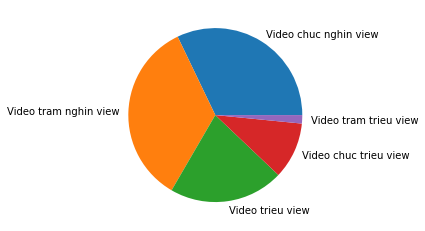

In [8]:
pieCharViewCounts(df_normal)

#### Xử lý tag và tên channel (thêm "_" vào các tag)


In [9]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [10]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [11]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['acv trending', 'acv', 'nhac tre moi nhat', '...
1       ['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...
3       ['tuyển tập nhạc trẻ', 'top 40 bài hát', 'tuyể...
4       ['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...
5       ['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...
                              ...                        
3181                                                     
3182    ['AMV', 'Gigiboz', 'Nhã đan Thiên nữ', 'Himeka...
3184    ['yêu edm vn', 'nhac thai lan remix', 'nhac ti...
3185    ['nhac tre', 'nhạc trẻ remix', 'nhac tre remix...
3187    ['nhạc buồn', 'nhạc tâm trạng', 'nhac buon', '...
Name: tags, Length: 2241, dtype: object


#### Xử lý topic categories

In [12]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [13]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))


Electronic_music  Pop_music
 Pop_music
Electronic_music  Pop_music
 Music_of_Asia Pop_music
 Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
 Pop_music
 Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
 Music_of_Asia
Electronic_music  Pop_music
 Pop_music
 Pop_music

Classical_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music 
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music  Pop_music
 Music_of_Asia Pop_music

 Pop_music
 Pop_music
Electronic_music 


Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music

Electronic_music  Pop_music

Electronic_music 
Electronic_music  Pop_music Rhythm_and_blues Soul_music
Electronic_music  Pop_music Soul_mus

In [14]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,8zKpSM3kDt4,2022-06-25T10:21:40Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H37M13S,2d,...,False,public,True,False,93101,0.0,0.0,0,13.0,
1,PnITknczlvU,2022-06-25T10:30:04Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M42S,2d,...,False,public,True,False,145034,0.0,0.0,0,38.0,Electronic_music Pop_music
3,0zpVSx9LHao,2021-06-09T11:00:00Z,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'top_40_bài_hát', 'tuyể...",10,vi,PT2H49M7S,2d,...,True,public,True,False,1501371,4832.0,0.0,0,118.0,Pop_music
4,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1179069,4322.0,0.0,0,78.0,Electronic_music Pop_music
5,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,163239,644.0,0.0,0,18.0,Music_of_Asia Pop_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,ElLRQwiyBIs,2019-07-21T12:22:46Z,TOP 10 CA KHÚC QUỐC TẾ HAY NHẤT MỌI THỜI ĐẠI -...,"Bạn là 8X, 9X đời đầu? Bạn có từng nghe nhạc t...",Blog Cảm Xúc,,10,vi,PT40M31S,2d,...,False,public,True,False,10329258,43654.0,0.0,0,3261.0,Pop_music
3182,N53Yo_FI-gc,2020-04-13T09:00:35Z,Ngàn Năm để cầu Nguyện 千年の祈り - Himekami (姫神) -...,#Himekami #NhãĐanThiênNữ #sennennoinori \nHime...,Gigi Boz,"['AMV', 'Gigiboz', 'Nhã_đan_Thiên_nữ', 'Himeka...",10,vi,PT2M11S,2d,...,False,public,False,False,2598770,42579.0,0.0,0,1284.0,
3184,deQMpXKvhTw,2022-06-24T10:53:20Z,Nhạc Thái Lan Remix HOT TIKTOK 2022 - Top Bài ...,🔴 CHÀO MỪNG ĐẾN VỚI KÊNH Yêu EDM Vn .\n\n🔰 Nếu...,Yêu EDM VN ツ,"['yêu_edm_vn', 'nhac_thai_lan_remix', 'nhac_ti...",10,,PT38M2S,2d,...,False,public,True,False,1563,64.0,0.0,0,3.0,Electronic_music Pop_music
3185,rdf0JJDksd8,2022-06-24T23:00:30Z,Top 20 Bài Hát Remix Hot Tiktok 2022 ✈ Nhạc Re...,Top 20 Bài Hát Remix Hot Tiktok 2022 ✈ Nhạc Re...,Min Ciu,"['nhac_tre', 'nhạc_trẻ_remix', 'nhac_tre_remix...",10,,PT1H6M31S,2d,...,False,public,True,False,720,33.0,0.0,0,0.0,Electronic_music Pop_music


#### Xử lý thời gian 

In [15]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [16]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [17]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,8zKpSM3kDt4,2022-06-25T10:21:40Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H37M13S,2d,...,0,13.0,,1,37,13,2022,6,25,5833
1,PnITknczlvU,2022-06-25T10:30:04Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M42S,2d,...,0,38.0,Electronic_music Pop_music,1,9,42,2022,6,25,4182
3,0zpVSx9LHao,2021-06-09T11:00:00Z,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'top_40_bài_hát', 'tuyể...",10,vi,PT2H49M7S,2d,...,0,118.0,Pop_music,2,49,7,2021,6,9,10147
4,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,78.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117
5,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635


#### Xử lý tên video 

In [18]:
# Hàm xóa bỏ một số từ gây nhiễu
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Xử lý giá trị các cột về số nguyên

In [19]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [20]:
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,8zKpSM3kDt4,2022-06-25T10:21:40Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H37M13S,2d,...,0,13.0,,1,37,13,2022,6,25,5833
1,PnITknczlvU,2022-06-25T10:30:04Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M42S,2d,...,0,38.0,Electronic_music Pop_music,1,9,42,2022,6,25,4182
3,0zpVSx9LHao,2021-06-09T11:00:00Z,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'top_40_bài_hát', 'tuyể...",10,vi,PT2H49M7S,2d,...,0,118.0,Pop_music,2,49,7,2021,6,9,10147
4,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,78.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117
5,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635


#### Phân tích một số mối quan hệ 

##### Phân phối các video theo số view, like

(array([1.641e+03, 2.400e+01, 8.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([       0. ,  1661710.1,  3323420.2,  4985130.3,  6646840.4,
         8308550.5,  9970260.6, 11631970.7, 13293680.8, 14955390.9,
        16617101. ]),
 <BarContainer object of 10 artists>)

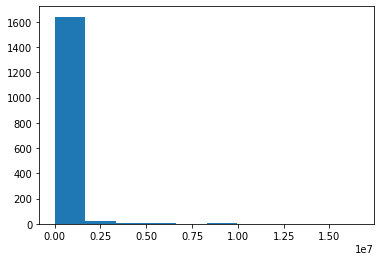

In [21]:
plt.hist(df_normal['likeCount'])

(array([1758.,  186.,  103.,   58.,   61.,   36.,   37.,   32.,   19.,
          20.]),
 array([    0. ,  9994.1, 19988.2, 29982.3, 39976.4, 49970.5, 59964.6,
        69958.7, 79952.8, 89946.9, 99941. ]),
 <BarContainer object of 10 artists>)

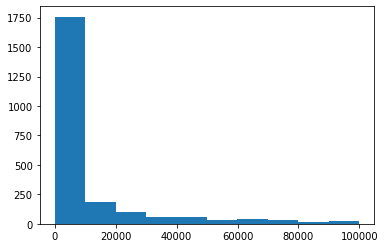

In [80]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

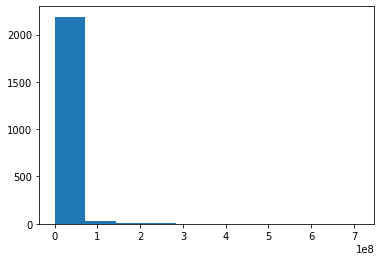

In [22]:
plt.hist(df_normal['viewCount']);

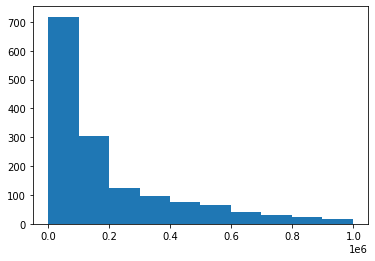

In [23]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([3.09e+03, 1.09e+02, 6.00e+00, 4.00e+00, 5.00e+00, 1.00e+00,
        4.00e+00, 3.00e+00, 3.00e+00, 2.50e+01]),
 array([    0. ,  8637.9, 17275.8, 25913.7, 34551.6, 43189.5, 51827.4,
        60465.3, 69103.2, 77741.1, 86379. ]),
 <BarContainer object of 10 artists>)

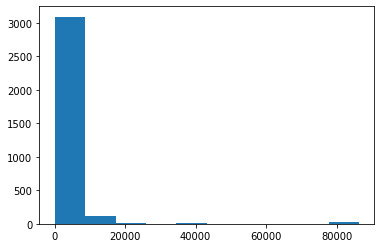

In [83]:
plt.hist(df_normal_preprocessed['durationInt'])

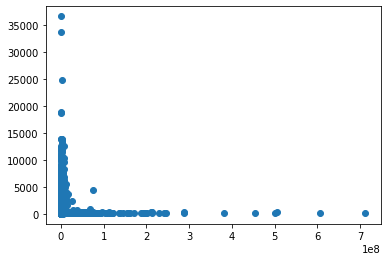

In [24]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

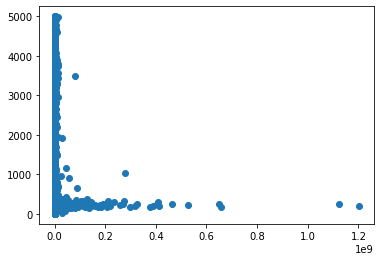

In [85]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


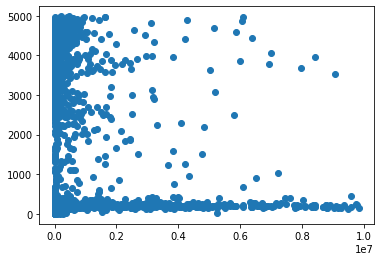

In [25]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### Quan hệ giữa các thuộc tính

In [26]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   
5  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...   
1  EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...   
3  Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...   
4  Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...   
5  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...   

                                         description        channelTitle  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...         Orinn Remix   
3  Top 40 Bài Hát Vpop Đạt Hàng Triệu Views Trên ...  TPT Music For Life   
4  Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...       Sai Gon Music   
5  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View

In [88]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 4960
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3250 non-null   object 
 1   publishAt             3250 non-null   object 
 2   title                 3250 non-null   object 
 3   description           3250 non-null   object 
 4   channelTitle          3250 non-null   object 
 5   tags                  3250 non-null   object 
 6   categoryId            3250 non-null   int64  
 7   defaultAudioLanguage  3250 non-null   object 
 8   duration              3250 non-null   object 
 9   dimension             3250 non-null   object 
 10  definition            3250 non-null   int64  
 11  caption               3250 non-null   int64  
 12  privacyStatus         3250 non-null   int64  
 13  embeddable            3250 non-null   int64  
 14  madeForKids           3250 non-null   int64  
 15  viewCount            

<AxesSubplot:>

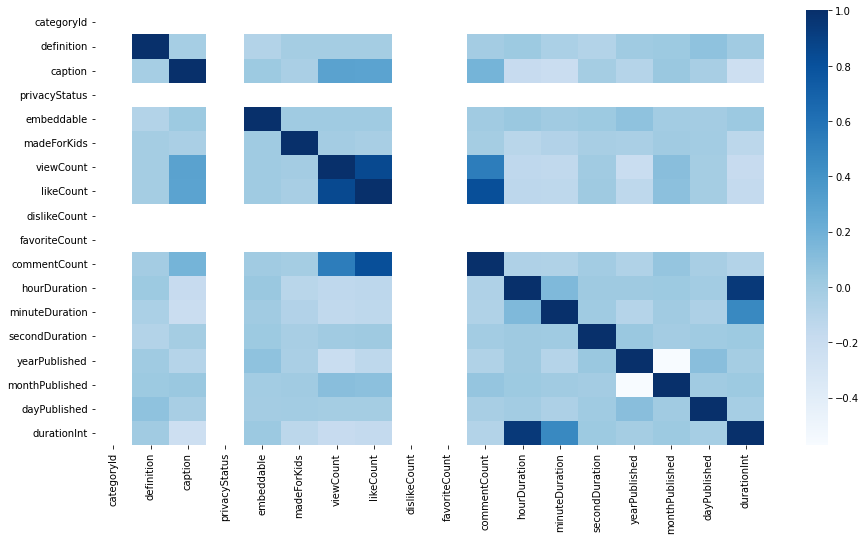

In [27]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

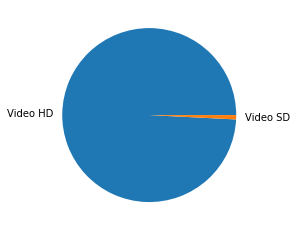

In [28]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

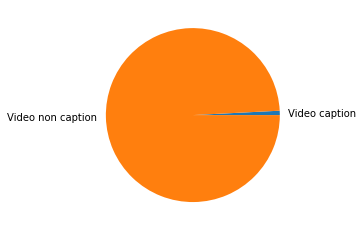

In [29]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

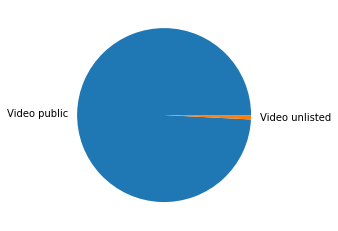

In [30]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

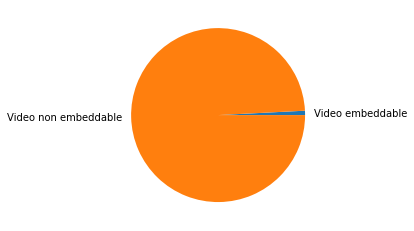

In [31]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

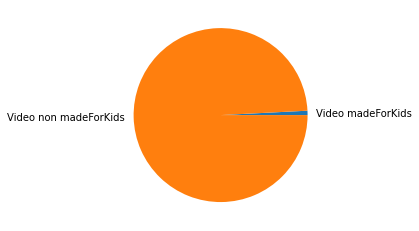

In [32]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Chuyển text thành vector IF TDF

In [33]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
    # Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nSố lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
    print(f"Kích thước dữ liệu sau khi xử lý: {data_preprocessed.shape}")
    print(f"Xem các từ trong từ điển: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [34]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Số lượng từ trong từ điển: 3786
Kích thước dữ liệu sau khi xử lý: (2241, 3786)
Xem các từ trong từ điển: {'trẻ': 3170, 'mới': 2014, 'hay': 1180, 'nhất': 2147, '2022': 61, 'liên': 1661, 'khúc': 1514, 'hiện': 1218, 'nay': 2048, 'chọn': 571, '128': 37, 'edm': 894, 'tiktok': 3069, 'bxh': 424, 'remix': 2537, 'top': 3101, '20': 54, 'bản': 454, '40': 86, 'vpop': 3348, 'đạt': 3645, 'hàng': 1265, 'triệu': 3133, 'views': 3329, 'trên': 3147, 'bảng': 455, 'xếp': 3516, 'hạng': 1291, 'say': 2647, 'thì': 3014, 'cứ': 699, 'yêu': 3556, 'bỏ': 468, 'đi': 3595, 'thất': 3035, 'tình': 3225, 'cấm': 686, 'nghe': 2073, 'về': 3394, 'đêm': 3623, 'view': 3328, 'hits': 1212, 'ngày': 2095, 'đầu': 3649, 'tiên': 3080, '30': 81, 'lofi': 1673, 'chill': 507, 'nonstop': 2179, 'bass': 302, 'cực': 702, 'mạnh': 1994, 'việt': 3341, 'mix': 1906, 'dj': 793, 'vinahouse': 3330, '15': 40, 'hot': 1234, 'orinn': 2271, 'lk': 1665, 'gây': 1128, 'nghiện': 2077, 'đế': 3663, 'vương': 3381, 'ai': 169, 'chung': 532, 'được': 3642, 'mãi': 

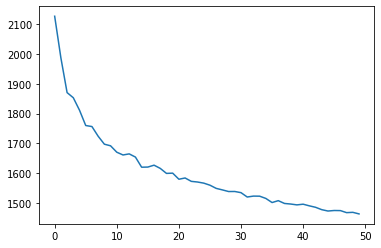

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [36]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00036842, 0.00117141, 0.00030513, ..., 0.00053988, 0.00134854,
        0.00046807],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00287289, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(2241,)
5
8
2
2
2
7
3
8
3
2
2
6
3
3
9
3
3
1
8
2
2
5
0
3
3
5
2
1
8
5
5
8
2
5
5
5
5
5
5
5
8
3
3
8
3
2
5
5
5
3
3
3
3
2
8
5
8
5
5
5
5
5
3
3
3
8
5
3
5
5
8
5
5
8
5
5
5
5
5
3
5
5
5
8
2
3
8
5
5
2
8
5
3
2
5
5
3
5
8
5
3
2
5
8
8
8
5
5
5
3
1
3
5
5
2
2
5
5
2
8
3
5
5
8
5
5
8
3
2
2
5
3
3
3
2
5
8
5
5
3
2
8
3
5
2
2
3
8
7
8
3
2
3
8
5
3
2
1
8
2
0
6
3
8
6
8
2
8
8
8
5
3
5
8
7
3
2
0
2
8
8
3
8
2
5
6
8
2
3
5
3
2
5
3
9
8
3
2
9
5
9
5
8
2
3
5
6
3
3
5
8
2
3
5
5
8
2
3
2
3
2
5
3
3
2
3
3
3
2
2
2
1
5
3
5
3
3
5
2
3
8
5
3
6
2
8
2
1
3
3
1
3
2
2
6
1
3
5
2
8
2
9
3
2
1
5
3
2
5
5
5
2
1
1
1
1
3
1
1
2
1
5
5
3
7
3
5
1
3
6
1
5
3
3
5
2
6
2
2
2
2
6
2
2
2
2
2
6
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
8
2
0
0
0
0
6
1
1
2
6
1
3
0
6
2
2
0
2
9
6
1
2
1


In [38]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 3187
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2241 non-null   object 
 1   publishAt             2241 non-null   object 
 2   title                 2241 non-null   object 
 3   description           2241 non-null   object 
 4   channelTitle          2241 non-null   object 
 5   tags                  2241 non-null   object 
 6   categoryId            2241 non-null   int64  
 7   defaultAudioLanguage  2241 non-null   object 
 8   duration              2241 non-null   object 
 9   dimension             2241 non-null   object 
 10  definition            2241 non-null   int64  
 11  caption               2241 non-null   int64  
 12  privacyStatus         2241 non-null   int64  
 13  embeddable            2241 non-null   int64  
 14  madeForKids           2241 non-null   int64  
 15  viewCount            

In [39]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



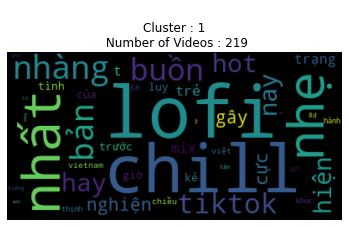

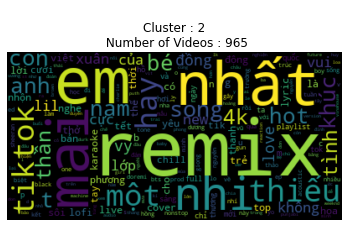

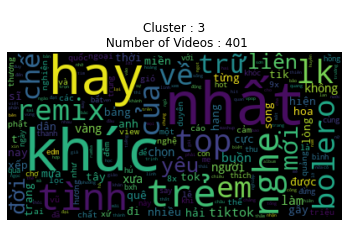

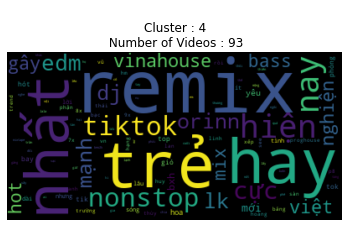

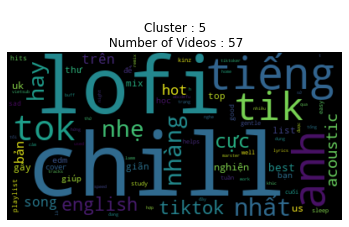

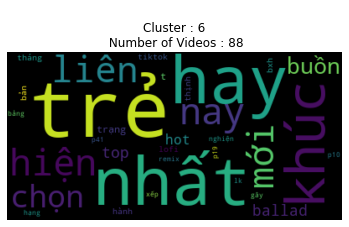

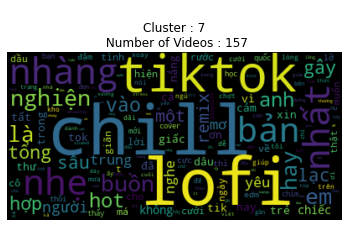

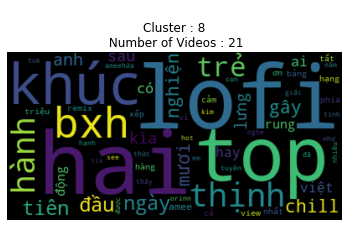

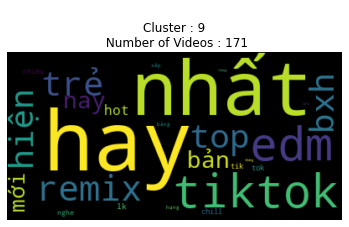

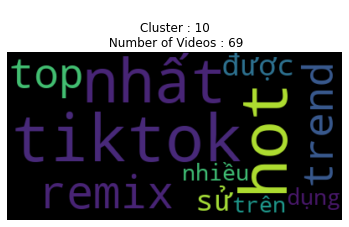

In [40]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


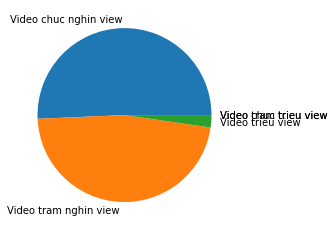

1


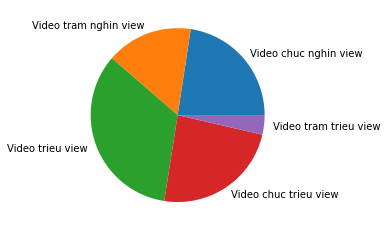

2


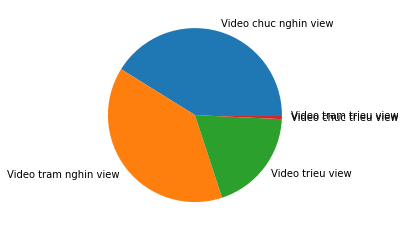

3


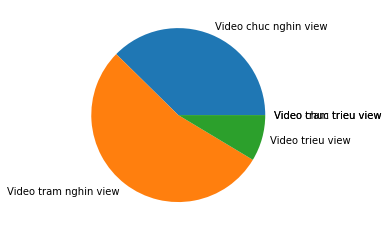

4


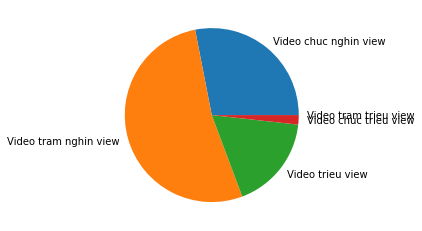

5


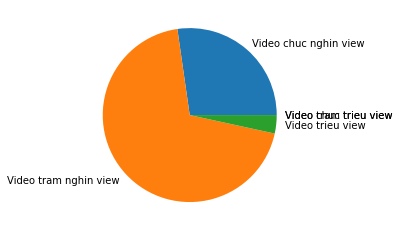

6


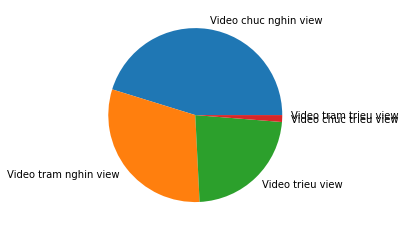

7


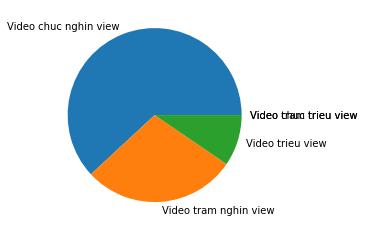

8


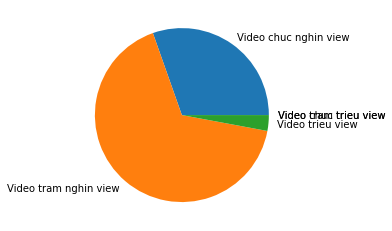

9


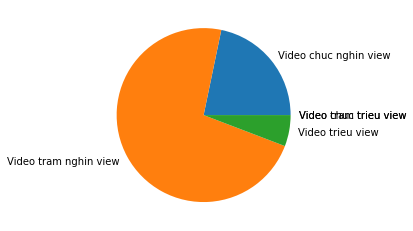

In [41]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [42]:
clustered_df = temp_df.groupby(['label']).sum()

In [43]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

,viewCount,likeCount,durationInt
label,,,
0,31860304,587867.0,845424
1,16729066349,329533149.0,691363
2,318852109,3061617.0,1951462
3,34036387,139875.0,361945
4,51459709,718810.0,180257
5,25254574,69241.0,505424
6,147754758,1577923.0,519501
7,4721984,14042.0,151747
8,51752084,1136116.0,818114


In [44]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [45]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Số lượng từ trong từ điển: 401
Kích thước dữ liệu sau khi xử lý: (157, 401)
Xem các từ trong từ điển: {'acoustic': 19, '8x9x': 17, 'xưa': 362, 'chill': 46, 'nhẹ': 225, 'nhàng': 218, 'top': 312, 'trẻ': 321, 'hot': 118, 'tiktok': 307, 'muốn': 185, 'em': 92, 'là': 159, 'remix': 257, 'chờ': 57, 'ngày': 207, 'cưới': 73, 'bxh': 38, 'gây': 108, 'nghiện': 205, 'mới': 201, 'nhất': 223, '2022': 8, 'hay': 112, '2021': 7, 'bỏ': 44, 'vào': 347, 'balocô': 29, 'ấy': 399, 'nói': 228, 'buồn': 36, 'trạng': 319, 'thanh': 282, 'xuân': 361, 'bản': 42, 'cover': 61, 'thư': 296, 'giãn': 96, 'đám': 376, 'miền': 183, 'tây': 327, 'nekko': 203, 'cưa': 72, 'đổ': 394, 'yêu': 366, 'khuê': 141, 'mộc': 198, 'lang': 151, 'edm': 91, 'hiện': 114, 'nay': 202, 'cảm': 76, 'ơn': 397, 'vì': 348, 'tất': 332, 'cả': 75, 'orinn': 240, 'anh': 23, 'quân': 249, 'idol': 133, 'tik': 306, 'tok': 311, 'thương': 297, 'đến': 391, 'gìa': 109, 'đã': 379, 'lạc': 167, 'lỡ': 173, 'người': 208, 'đậm': 388, 'sâu': 276, 'vội': 355, 'quên': 250, 

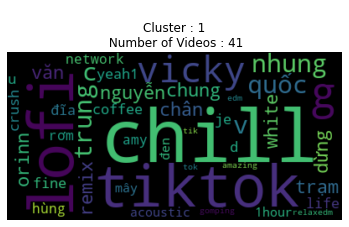

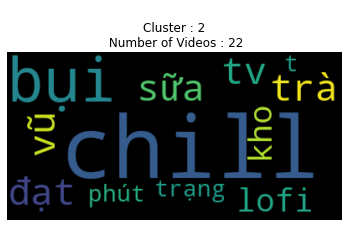

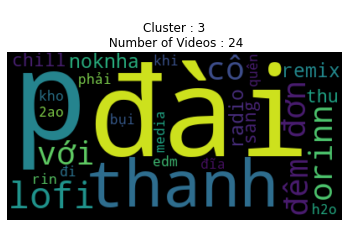

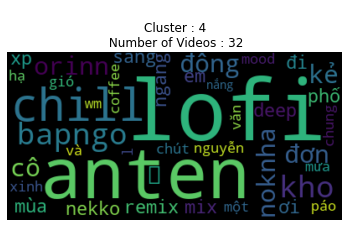

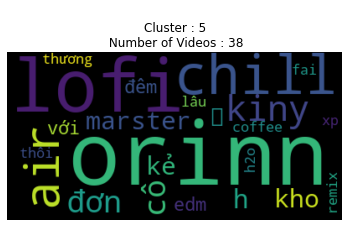

In [46]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


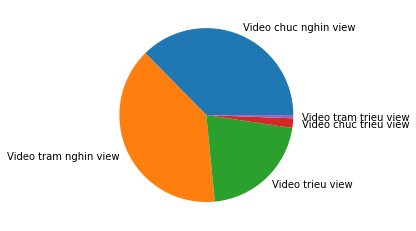

1


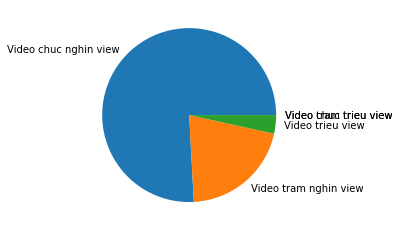

2


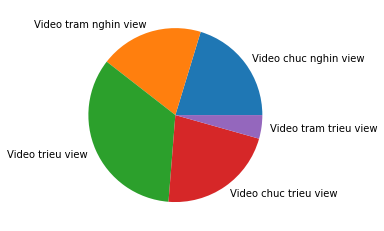

3


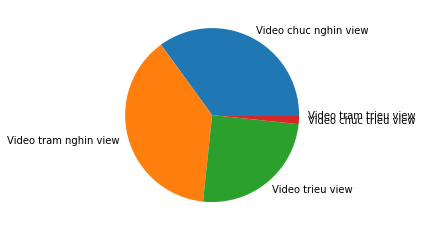

4


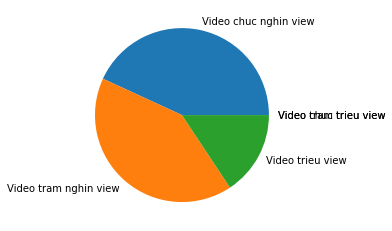

In [109]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [110]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      994396138
likeCount      7257261.0
durationInt      2442637
dtype: object

In [111]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      22540015279
likeCount      468590668.0
durationInt         724511
dtype: object

In [112]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

TOP Những Bài Hát ĐANG GÂY BÃO Trên Các BXH Âm Nhạc | Như Một Người Dưng, Người Lạ Thoáng qua
TOP Những Bài Hát ĐANG GÂY BÃO Trên Các BXH Âm Nhạc | Người Lạ Thoáng Qua, Hẹn Kiếp Sau
NAM EM PLAYLIST | NGƯỜI KỂ CHUYỆN TÌNH BẰNG ÂM NHẠC
ÂM NHẠC 6 - Những ước mơ KARAOKE - KẾT NỐI TRI THỨC
TOP Những Bài Hát ĐANG GÂY BÃO Trên Các BXH Âm Nhạc | Ai Chung Tình Được Mãi, Người Lạ Thoáng Qua
Lk Mẹ Hiền Quan Âm - Nhạc Phật Giáo Chọn Lọc 2021 Tĩnh Tâm Xua Tan Buồn Phiền
[HÁT MẪU] CHÀO NGƯỜI BẠN MỚI ĐẾN - ÂM NHẠC LỚP 1 KẾT NỐI TRI THỨC VỚI CUỘC SỐNG - PHẠM HOÀI LINH
Con Chim Non - Karaoke Âm Nhạc Lớp 3 | Lớp Nhạc Doremi
Giấc mơ trưa - Tùng Dương (liveshow Con đường âm nhạc)
SẮC MÀU ÂM NHẠC | THÁNG 10 - 2021 | NGƯỜI DÌU CON ĐI
[Âm Nhạc Xứ Nẫu] #03: Liên Khúc Nhạc Ngoại Lời Việt | MV Quay tại Phú Yên Camping Trip
HÀNH TRÌNH CỦA THANH ÂM | MỘT ĐÊM SAY | ANDIEZ - THỊNH SUY COVER
Những ước mơ KARAOKE | Âm nhạc lớp 6 | KẾT NỐI TRI THỨC
Con đường học trò KARAOKE | Âm nhạc lớp 6 | Kết nối tri thức.
Thanh Tu

In [113]:
print(wordcloud.words_)

{'bolero': 1.0, 'yan': 0.56, 'sống': 0.52, 'beat': 0.24, 'chất': 0.24, 'lượng': 0.24, 'o': 0.24, 'quê': 0.2, 'hồng': 0.16, 'lúa': 0.16, 'xinh': 0.16, 'tuấn': 0.12, 'chung': 0.12, 'giai': 0.12, 'điệu': 0.12, 'sông': 0.12, 'văn': 0.12, 'phú': 0.12, 'gái': 0.12, 'hay': 0.12, 'đảo': 0.08, 'vàng': 0.08, 'trangpi': 0.08, 'bikini': 0.04, 'yêu': 0.04, 'miền': 0.04, 'tây': 0.04, 'tn': 0.04, 'thanh': 0.04, 'hải': 0.04, 'thôn': 0.04, 'nhất': 0.04, 'thúy': 0.04, 'xưa': 0.04, 'tuyệt': 0.04, 'phẩm': 0.04, 'bướm': 0.04}


# Test Gaussian Mixture Clustering

In [47]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X.toarray())

In [115]:
dir(gm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_initial_parameters',
 '_check_n_features',
 '_check_parameters',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_weighted_log_prob',
 '_estimator_type',
 '_get_param_names',
 '_get_parameters',
 '_get_tags',
 '_initialize',
 '_initialize_parameters',
 '_m_step',
 '_more_tags',
 '_n_parameters',
 '_print_verbose_msg_init_beg',
 '_print_verbose_msg_init_end',
 '_print_verbose_msg_iter_end',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundl

In [117]:
gm.score(X.toarray())


20246.778195999126

In [118]:
gm.covariances_

array([[[ 1.39492189e-04, -5.70394670e-08, -9.14841983e-08, ...,
         -7.27374296e-08, -4.31779711e-08, -4.31779711e-08],
        [-5.70394670e-08,  8.45883692e-05, -5.02493739e-08, ...,
         -3.99523673e-08, -2.37162926e-08, -2.37162926e-08],
        [-9.14841983e-08, -5.02493739e-08,  1.09550040e-04, ...,
         -6.40786194e-08, -3.80379784e-08, -3.80379784e-08],
        ...,
        [-7.27374296e-08, -3.99523673e-08, -6.40786194e-08, ...,
          1.36928597e-04, -3.02433079e-08, -3.02433079e-08],
        [-4.31779711e-08, -2.37162926e-08, -3.80379784e-08, ...,
         -3.02433079e-08,  4.88982225e-05,  4.78982225e-05],
        [-4.31779711e-08, -2.37162926e-08, -3.80379784e-08, ...,
         -3.02433079e-08,  4.78982225e-05,  4.88982225e-05]],

       [[ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e-06,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [120]:
a=gm.predict(X.toarray())


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
